# Impact of Users Characteristics on Bike riding duration
## by Ahmed Atta

## Investigation Overview

> In this investigation i wanted to look at the Characteristics of users and weekday that could predict the duration time of riding ,The main focus is on Users Type , gender , age.

## Dataset Overview

> The dataset includes information of 174952 bike riding records in February 2019 for Sanfrancesco city ,The dataset includes many variables but i focused on Users Type , member gender , member birth year ,duration and start time. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
sf_df = pd.read_csv('201902-fordgobike-tripdata.csv')

#drop the null values in the dataframe
sf_df.dropna(inplace=True)

#let's change start_time and end_time datatype to datetime 
sf_df['start_time'] = pd.to_datetime(sf_df['start_time'])
sf_df['end_time'] = pd.to_datetime(sf_df['end_time'])
#change the start_station_id and end_station_id from float to int 
sf_df['start_station_id'] = sf_df['start_station_id'].astype(int)
sf_df['end_station_id'] = sf_df['end_station_id'].astype(int)
sf_df['member_birth_year'] = sf_df['member_birth_year'].astype(int)

#create a new column for day of week
sf_df['day_of_week'] = sf_df['start_time'].dt.day_name()

#drop records for users born before 1910
sf_df= sf_df[sf_df['member_birth_year'] > 1910]

#coverting the duration column from seconds to minutes
sf_df['duration_sec'] = sf_df['duration_sec']/60
sf_df.rename(columns={'duration_sec' : 'duration'},inplace=True)

## Distribution of Rides Duration

> Rides durations in the dataset take on a wide range of values, from about 1 minute up to 23 hours at the highest. Plotted on a logarithmic scale, the distribution of the rides duration looks normally distributed as bell shape

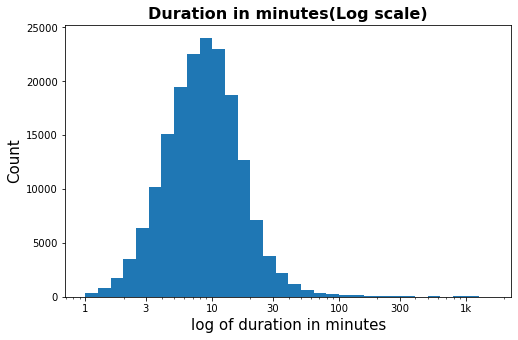

In [3]:
logbinsize = 0.1
logbins = 10 ** np.arange(0,np.log10(sf_df['duration'].max())+logbinsize , logbinsize)
plt.figure(figsize=[8, 5])
plt.hist(data= sf_df , x = 'duration',bins = logbins)
plt.xscale('log')
plt.xticks([1,3,10,30,100,300,1000],[1,3,10,30,100,300,'1k'])

plt.title('Duration in minutes(Log scale)',fontsize=16 , weight='bold')
plt.xlabel('log of duration in minutes',fontsize=15)
plt.ylabel('Count',fontsize=15);

## Distribution of Members birth year

> Members age is very important factor as most bike riders are born between 1980 and 1997 with gradually decreasing frequecy as birth year decreases with the highest peak between 1986 and 1988 , and roughly decrease for users born after 1997.

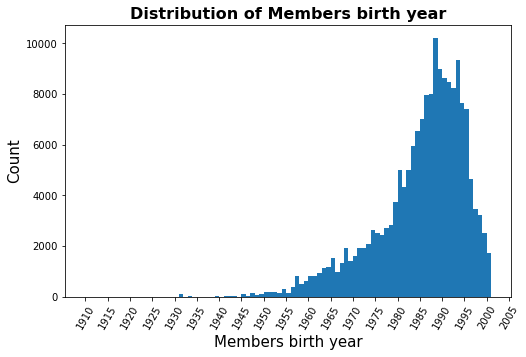

In [4]:
bins = np.arange(1910,sf_df['member_birth_year'].max()+1 , 1)
ticks = np.arange(1910,sf_df['member_birth_year'].max()+5,5)
plt.figure(figsize=[8, 5])
plt.hist(data= sf_df , x = 'member_birth_year',bins=bins)
plt.xticks(ticks,rotation=60)
plt.xlabel('Members birth year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Distribution of Members birth year',fontsize=16 ,weight= 'bold');

## Distribution of Member gender
> Male members are the most majority of riders as they are about three times the count of female members while other gender members are very little


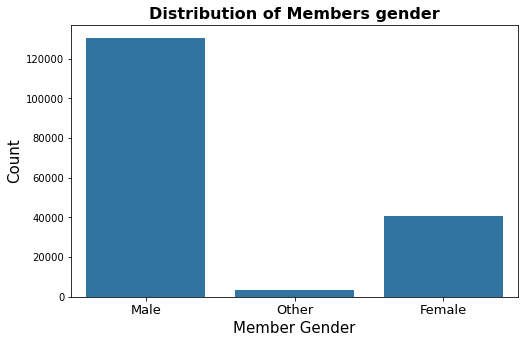

In [7]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]

sb.countplot(data = sf_df, x = 'member_gender', color = base_color)
plt.xlabel('Member Gender',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13)
plt.title('Distribution of Members gender',fontsize=16, weight ='bold');

## Distribution of User Type
> Subscriber users are the most majority of all the users with more than 140000 records while customer user type have less than 20000 records.


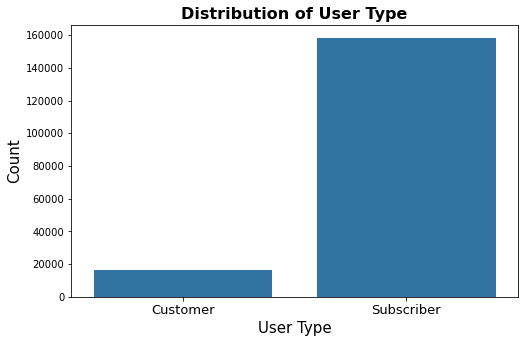

In [8]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]

sb.countplot(data = sf_df, x = 'user_type', color = base_color)
plt.xlabel('User Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13)
plt.title('Distribution of User Type',fontsize=16, weight ='bold');

## Duration Average vs User Type
> Customer users ride bikes more than subscriber users as they ride for more than 20 minutes on average while subscribers ride bikes for about 10 minutes on average.


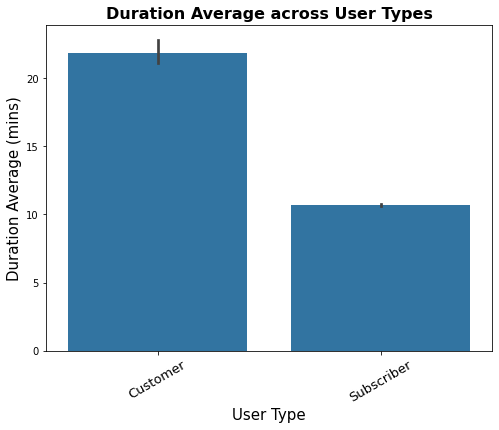

In [10]:
plt.figure(figsize = [8, 6])
sb.barplot(x=sf_df['user_type'],y=sf_df['duration'], color = base_color)
plt.xticks(rotation=30,fontsize=13)
plt.ylabel('Duration Average (mins)',fontsize=15)
plt.xlabel('User Type',fontsize=15)
plt.title('Duration Average across User Types',fontsize=16, weight='bold');

## Duration average vs Members gender
> While Males are the most users but they take the bikes for only 10 minutes on average , and females take a little longer but users of gender other use the bikes longer than 15 minutes on average

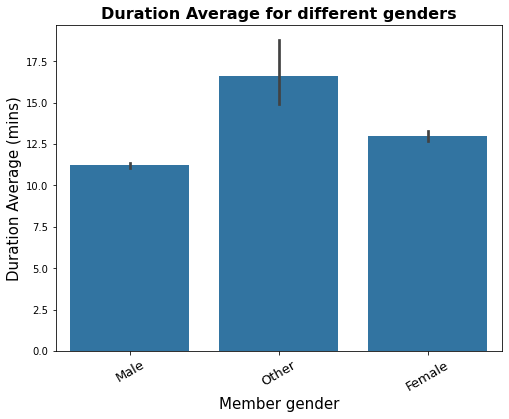

In [11]:
plt.figure(figsize = [8, 6])
sb.barplot(x=sf_df['member_gender'],y=sf_df['duration'], color = base_color)
plt.xticks(rotation=30,fontsize=13)
plt.ylabel('Duration Average (mins)',fontsize=15)
plt.xlabel('Member gender',fontsize=15)
plt.title('Duration Average for different genders',fontsize=16, weight='bold');

## Relation between duration and each Gender birth year 
> Most Males born from 1940 to 2001 ride bikes less than 90 minutes with a peak at about 1932 Users who defined themselves as others are born from 1960 to 2000 and they use bikes for less than 40 minutes in most cases but some of them born near 1964 use bike for longer durations , while most of females born after 1950 use bikes for less than 60 minutes

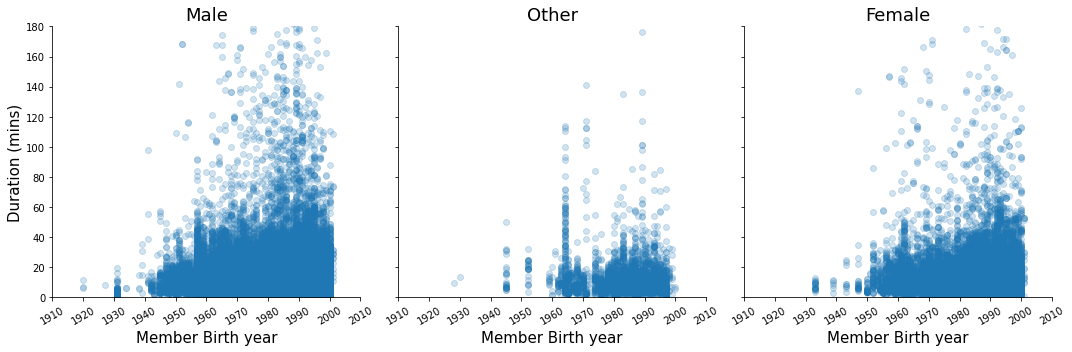

In [4]:
g=sb.FacetGrid(data=sf_df,col='member_gender',height=5)
g.map(plt.scatter,'member_birth_year','duration',alpha= 1/5)
g.set(ylim=(0,180))
g.set_xlabels('Member Birth year',fontsize=15)
g.set_ylabels('Duration (mins)',fontsize=15)
g.set_xticklabels(rotation=30)
g.set_titles(col_template="{col_name}", row_template="{row_name}",size=18)
g.tight_layout();
